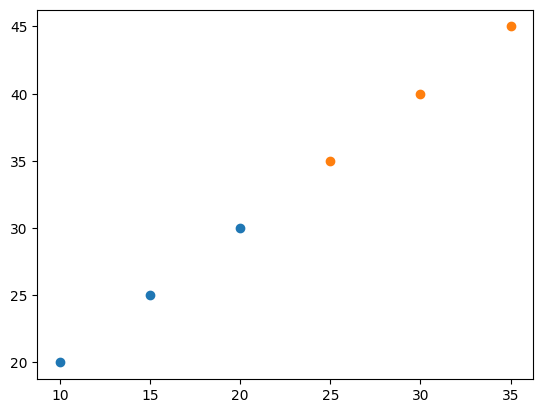

In [12]:
import numpy as np
import matplotlib.pylab as plt

# Expempel data för pichu och pickachu
pichu_data = np.array([[10, 20], [20, 30], [15, 25]])
pikachu_data = np.array([[25, 35], [30, 40], [35, 45]]) 

# plottar testdatan där punkterna läses in från 0 som punktens första värde som är width och 1 som är det andra värdet height
plt.scatter(pichu_data[:, 0], pichu_data[:, 1])
plt.scatter(pikachu_data[:, 0], pikachu_data[:, 1])
plt.show()